<a href="https://colab.research.google.com/github/Harsh6063/Data_science/blob/main/Deep_Learning%20Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv("/content/Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5092,5093,15596303,White,688,France,Female,39,0,0.00,2,1,0,53222.15,1
9604,9605,15687363,McMillan,770,France,Male,31,3,155047.56,2,1,1,186064.34,0
7998,7999,15772482,Iloerika,829,Germany,Male,28,3,132405.52,3,1,0,104889.20,1
5439,5440,15582168,Muravyova,713,Germany,Female,61,4,149525.34,2,1,0,123663.63,0
1174,1175,15588670,Despeissis,705,Spain,Female,40,5,203715.15,1,1,0,179978.68,1


In [21]:
df.shape

(10000, 14)

In [11]:
df1=df.drop(columns=['RowNumber',	'CustomerId',	'Surname'])
df1.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6377,692,France,Male,33,9,0.00,1,1,0,113505.93,1
2201,600,France,Male,35,4,143744.77,2,1,0,104076.51,0
4168,516,France,Male,37,8,0.00,1,1,0,101834.58,0
562,607,Spain,Male,36,8,158261.68,1,1,1,76744.72,0
8258,590,France,Male,41,1,89086.31,1,1,0,24499.97,0


In [13]:


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['Geography'] = le.fit_transform(df1['Geography'])
df1['Gender'] = le.fit_transform(df1['Gender'])
df1.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5472,457,1,1,42,4,126772.57,1,0,1,126106.40,0
1884,656,0,1,35,6,0.00,2,1,0,1485.27,0
6523,671,2,0,31,4,0.00,2,0,1,79270.02,0
979,550,0,0,46,7,0.00,2,1,0,130590.35,0
4012,554,2,1,46,4,0.00,2,0,1,57320.92,0


In [15]:


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df1[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(df1[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])

df1.sample(5)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3062,0.464,0,0,0.297297,0.9,0.000000,3,1,1,0.304743,0
7644,0.650,0,1,0.135135,0.9,0.000000,1,1,0,0.670561,0
5469,0.746,0,1,0.040541,0.4,0.000000,2,0,0,0.124189,0
7072,0.672,0,1,0.256757,0.9,0.536316,1,1,0,0.137937,0
9375,0.618,1,1,0.405405,0.4,0.492603,2,1,0,0.412327,1


In [16]:
x=df1.iloc[:,0:10]
y=df1.Exited

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=42)

In [20]:
x_train.shape

(3000, 10)

In [25]:
model = keras.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=(10,)),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.5684 - accuracy: 0.7350
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5003 - accuracy: 0.7910
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4856 - accuracy: 0.7910
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.7910
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4699 - accuracy: 0.7917
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4636 - accuracy: 0.7923
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.7983
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.7993
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.8037
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.8053
Epoch 11/

In [26]:
model.evaluate(x_test,y_test)

219/219 [==============================] - 0s 1ms/step - loss: 0.3744 - accuracy: 0.8439


[0.37438130378723145, 0.8438571691513062]

In [30]:
y_pred=model.predict(x_test)
y_pred

219/219 [==============================] - 0s 1ms/step


array([[0.20403714],
       [0.05061648],
       [0.21737713],
       ...,
       [0.4261904 ],
       [0.32502264],
       [0.23011455]], dtype=float32)

In [39]:
y_test[300:315]

7093    1
1408    0
6690    0
3400    0
108     0
5635    0
8481    0
6603    0
1090    0
5559    1
9411    1
8142    0
8663    0
6595    0
623     0
Name: Exited, dtype: int64

In [40]:
results=[]
for element in y_pred:
    if element > 0.5:
        results.append(1)
    else:
        results.append(0)
results[300:315]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

Text(50.722222222222214, 0.5, 'True')

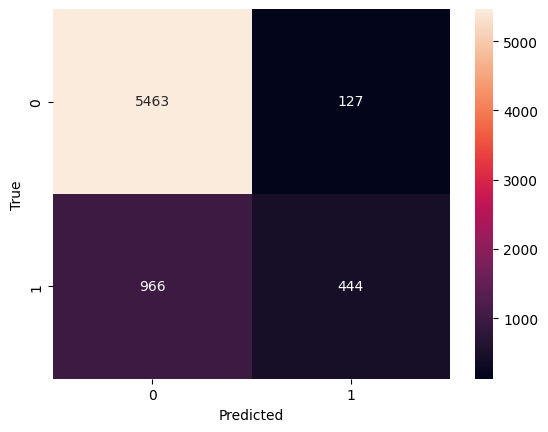

In [38]:
# prompt: plot cm

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, results)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
